In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import svm
from sklearn import metrics


In [2]:
data=pd.read_csv('cell_samples.csv')
data.head()


,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
data.head(20)
data.count()
data['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [4]:
malignant_df=data[data['Class']==4][:200]
benign_df=data[data['Class']==2][:200]

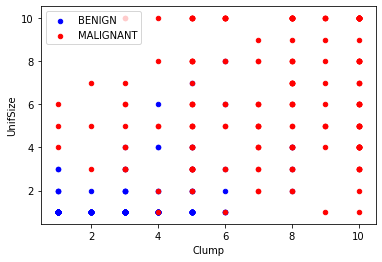

In [5]:

axes=benign_df.plot(kind='scatter', x='Clump', y='UnifSize', color='blue', label='BENIGN')
malignant_df.plot(kind='scatter', x='Clump', y='UnifSize', color='red', label='MALIGNANT', ax=axes)


In [6]:
data.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [7]:
data=data[pd.to_numeric(data['BareNuc'],errors='coerce').notnull()]

data['BareNuc']=data['BareNuc'].astype(int)



In [8]:
data.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [9]:
data.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [10]:
data.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [11]:
X=data[['Clump', 'UnifSize', 'UnifShape','MargAdh', 'SingEpiSize', 'BareNuc' ,'BlandChrom','NormNucl','Mit']]
y=data['Class']

In [12]:

x_train,x_test,y_train,y_test= sklearn.model_selection.train_test_split(X,y,test_size=0.2)

clf=svm.SVC(kernel='linear',C=8)

clf.fit(x_train,y_train)


SVC(C=8, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [13]:
y_pred=clf.predict(x_test)
acc=metrics.accuracy_score(y_test,y_pred)
acc


0.9416058394160584

In [14]:
y_test=list(y_test)
x_test=pd.DataFrame(x_test)
x_test.values



array([[ 5,  1,  3, ...,  2,  1,  1],
       [ 6, 10, 10, ..., 10, 10,  7],
       [ 3,  2,  1, ...,  3,  1,  1],
       ...,
       [ 5,  3,  3, ...,  4,  4,  1],
       [ 3,  4,  4, ...,  3,  3,  1],
       [ 4,  1,  1, ...,  3,  1,  1]])

In [15]:
data.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [39]:
#Cheking model accuracy by comparing actual known results with the predicted ones 
print('Predicted    Input        Actual')
print()
for i in range(len(y_pred)):
    print(' ',y_pred[i],'  ',x_test.values[i],' ',y_test[i])

Predicted    Input        Actual

  2    [5 1 3 1 2 1 2 1 1]   2
  4    [ 6 10 10 10  8 10 10 10  7]   4
  2    [3 2 1 2 2 1 3 1 1]   2
  2    [4 2 1 1 2 1 2 1 1]   2
  4    [ 6 10 10 10  8 10  7 10  7]   4
  2    [2 1 1 1 2 1 2 1 1]   2
  4    [10  8  4  4  4 10  3 10  4]   4
  4    [ 5 10 10  3  8  1  5 10  3]   4
  2    [6 1 1 3 2 1 1 1 1]   2
  2    [2 1 1 1 1 1 3 1 1]   2
  2    [1 1 3 2 2 1 3 1 1]   2
  2    [5 1 1 1 2 1 3 1 1]   2
  2    [5 1 1 2 2 2 3 1 1]   2
  2    [6 3 4 1 5 2 3 9 1]   4
  4    [8 4 6 3 3 1 4 3 1]   2
  2    [4 1 1 1 2 1 2 1 1]   2
  2    [3 1 1 1 1 1 2 1 1]   2
  2    [6 1 1 1 1 1 1 1 1]   2
  2    [4 1 1 1 2 1 3 1 1]   2
  2    [1 1 1 1 1 1 2 1 1]   2
  2    [3 2 2 2 2 1 3 2 1]   2
  2    [2 1 1 1 2 1 1 1 1]   2
  4    [ 6  1  3  1  4  5  5 10  1]   4
  2    [3 1 1 1 2 3 3 1 1]   2
  2    [1 1 1 1 2 2 1 1 1]   2
  2    [2 1 1 1 2 1 2 1 1]   2
  4    [8 2 3 1 6 3 7 1 1]   4
  2    [1 1 1 1 2 1 1 1 1]   2
  4    [7 2 4 1 3 4 3 3 1]   4
  2    [2 1 1 1 2 1 3 

In [17]:
x_input=[]

In [18]:
def predictVal(*x_input):
    x_input=input().split(',')
    x_input = np.asarray(x_input)
    x_input.reshape(-1,1)
    x_predict=clf.predict([x_input])
    if(x_predict==2):
        print('BENIGN CELL !')
    elif(x_predict==4):
        print('MALIGNANT CELL!')

In [19]:
Ch='y'
while(Ch=='y'):
    print('*********************************************CANCER CELL PREDICTION*************************************')
    print()
    predictVal([[*x_input]])
    print('Do you want to continue?(y/n)')
    Ch=input()
    

*********************************************CANCER CELL PREDICTION*************************************

1,1,1,1,1,1,2,1,1
BENIGN CELL !
Do you want to continue?(y/n)
n
